In [2]:
import librosa as lb
import pandas as pd
import scipy
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import os
from pylab import plot, show, figure, imshow, xlim, ylim, title
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras import layers
from keras import models

Using TensorFlow backend.


In [3]:
#CONSTANTS

DATA_DIR = "data/"
CATEGORY_COUNT = 8


In [4]:


class Instrument:
    def __init__(self, name, audio, mfcc, category):
        self.name = name  
        self.audio = audio  
        self.mfcc = mfcc
        self.category = category

instruments = []
        
i = 0
for folder in os.listdir(DATA_DIR):
    if "." not in folder:
        new_instrument = Instrument(folder, [], [], i)
        print(new_instrument.name, 'started')
        for file_path in os.listdir(DATA_DIR + folder):
            if file_path.endswith(".mp3"):
                try:
                    audio, sr = lb.load(DATA_DIR + folder + "/" + file_path)
                    #audio, sr = lb.core.load(lb.util.example_audio_file())
                    new_instrument.audio.append(audio)
                except:
                    print('Failed to add',folder + "/" + file_path + ' (' + str(len(new_instrument.audio)) + '. ' + new_instrument.name + ').')
        instruments.append(new_instrument)   
        print(new_instrument.name, 'added')
        i+=1
    
print('FINISHED')

banjo started
banjo added
clarinet started
clarinet added
flute started
flute added
guitar started
guitar added
oboe started
oboe added
saxophone started
Failed to add saxophone/saxophone_Fs3_15_fortissimo_normal.mp3 (577. saxophone).
saxophone added
trombone started
trombone added
trumpet started
trumpet added
FINISHED


In [5]:
for instrument in instruments:
    instrument.mfcc = []
    for audio in instrument.audio:
            mfccs = lb.feature.mfcc(y=audio,n_mfcc=13)
            mfccs = lb.util.normalize(mfccs)
            scipy.linalg.norm(mfccs)
           # mfccs = mfccs / 500
            instrument.mfcc.append(mfccs.mean(axis=1))

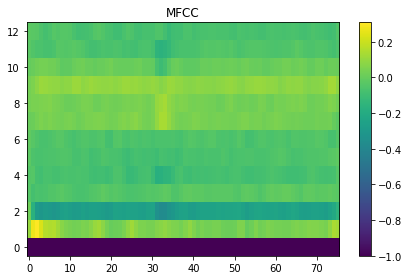

In [6]:
imshow(mfccs, aspect = 'auto', origin='lower', interpolation='none')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [7]:
'''w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()

for instrument in instruments:
    instrument.mfcc = []
    for audio in instrument.audio:
            mfccs = []
            melbands = []
            melbands_log = []
            for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
                    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
                    mfccs.append(mfcc_coeffs)
                    melbands.append(mfcc_bands)
            mfccs = essentia.array(mfccs).mean(axis=0)
            mfccs = mfccs / 500
            instrument.mfcc.append(mfccs)
   # melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)

melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plot
imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

#imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
#plt.title("Log-normalized mel band spectral energies in frames")
#show()

#imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none')
#plt.title("MFCCs in frames")
#show()'''

'w = Windowing(type = \'hann\')\nspectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum\nmfcc = MFCC()\n\nfor instrument in instruments:\n    instrument.mfcc = []\n    for audio in instrument.audio:\n            mfccs = []\n            melbands = []\n            melbands_log = []\n            for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):\n                    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))\n                    mfccs.append(mfcc_coeffs)\n                    melbands.append(mfcc_bands)\n            mfccs = essentia.array(mfccs).mean(axis=0)\n            mfccs = mfccs / 500\n            instrument.mfcc.append(mfccs)\n   # melbands_log.append(logNorm(mfcc_bands))\n\n# transpose to have it in a better shape\n# we need to convert the list to an essentia.array first (== numpy.array of floats)\n\nmelbands = essentia.array(melbands).T\nmelbands_log = essentia.array(melbands_log).T\n\n# and p

In [8]:
mfccs.shape

(13, 76)

In [9]:

for instrument in instruments:
    print(len(instrument.mfcc))

74
846
878
106
596
732
831
485


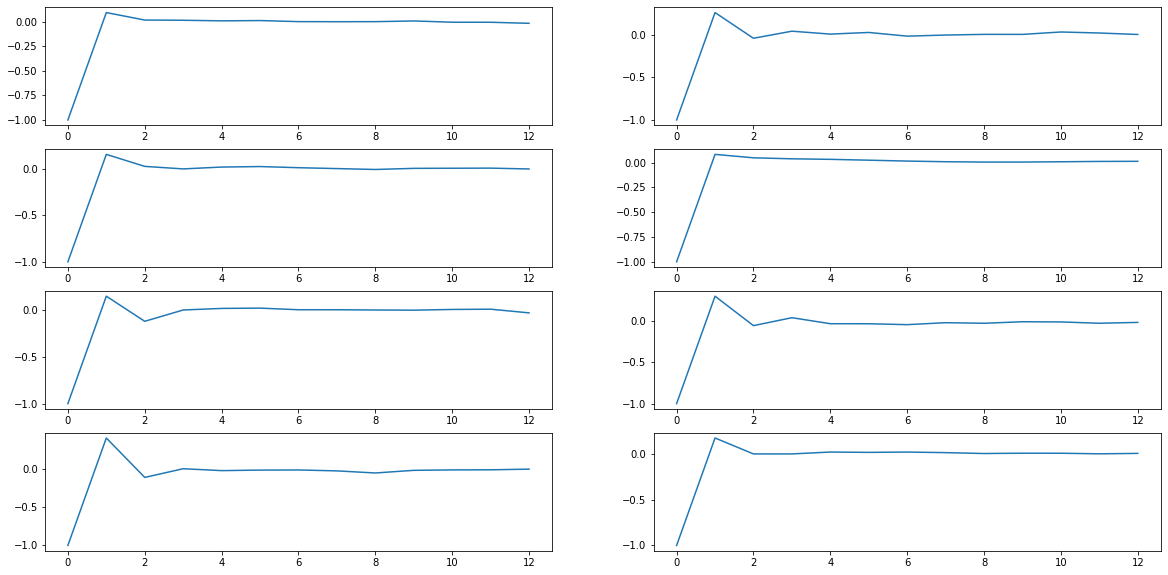

In [10]:

fig = plt.figure(figsize=(20,10))
i = 0
for instrument in instruments:
    i += 1
    fig.add_subplot(4,2,i)
    plot(instrument.mfcc[3])
    #ylim(-1,1)
show()

In [11]:
X = []
y = []

for instrument in instruments:
    i = 0
    for mfcc in instrument.mfcc:
        i += 1
        X.append(mfcc)
        y.append(instrument.category)

X = np.array(X) 
print(X.shape)
X = X.astype('float32')
y = np.array(y)

print(len(X))
print(len(X[0]))
print(X.shape)
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

(4548, 13)
4548
13
(4548, 13)


In [12]:



print(len(X_train))
print(len(y_train))
print(y_train[1])
y_train = np_utils.to_categorical(y_train,CATEGORY_COUNT)
y_test = np_utils.to_categorical(y_test,CATEGORY_COUNT)
print(len(X_train))
print(X_train.shape)

3411
3411
1
3411
(3411, 13)


In [13]:
model = models.Sequential()
#model.add(layers.Conv2D(filters=8,kernel_size=(3,3), input_shape=(3411,13,1),activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=CATEGORY_COUNT, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
y_train.dtype

dtype('float32')

In [15]:

history = model.fit(X_train, y_train, epochs=70, batch_size=128) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
3411/3411 [==============================] - 0s 135us/step - loss: 1.9611 - acc: 0.1976
Epoch 2/70
3411/3411 [==============================] - 0s 52us/step - loss: 1.8764 - acc: 0.2580
Epoch 3/70
3411/3411 [==============================] - 0s 48us/step - loss: 1.7858 - acc: 0.3075
Epoch 4/70
3411/3411 [==============================] - 0s 47us/step - loss: 1.5668 - acc: 0.3967
Epoch 5/70
3411/3411 [==============================] - 0s 47us/step - loss: 1.3611 - acc: 0.4503
Epoch 6/70
3411/3411 [==============================] - 0s 47us/step - loss: 1.2164 - acc: 0.5151
Epoch 7/70
3411/3411 [==============================] - 0s 48us/step - loss: 1.0849 - acc: 0.5758
Epoch 8/70
3411/3411 [==============================] - 0s 46us/step - loss: 0.9698 - acc: 0.6230
Epoch 9/70
3411/3411 [==============================] - 0s 48us/step - loss: 0.8768 - acc: 0.6614
Epoch 10/70
3411/3411 [==============================] - 0s 48us/step

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 808       
Total params: 165,004
Trainable params: 165,004
Non-trainable params: 0
_________________________________________________________________


In [17]:
loss, acc = model.evaluate(X_test, y_test)
print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

1137/1137 [==============================] - 0s 72us/step
Test loss: 0.3366647146072111
Test accuracy: 87.86%


In [18]:
new = model.predict_classes(X)
for i in range(len(X)):
	print("Predicted=%s" % ( new[i]))

Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=3
Predicted=3
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=3
Predicted=0
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Pred

Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=5
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=5
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=6
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Predicted=2
Pred

Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=7
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=1
Predicted=6
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=7
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Predicted=5
Pred

Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=5
Predicted=6
Predicted=6
Predicted=5
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=5
Predicted=5
Predicted=6
Predicted=6
Predicted=6
Predicted=5
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Predicted=6
Pred

In [23]:
print(X_train.shape[1])

model2 = models.Sequential()
#model.add(layers.Conv2D(filters=8,kernel_size=(3,3), input_shape=(3411,13,1),activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Flatten())
model2.add(layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(units=256, activation='relu'))
model2.add(layers.Dense(units=100, activation='relu'))
model2.add(layers.Dense(units=CATEGORY_COUNT, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

13


In [20]:
history = model2.fit(X_train, y_train, epochs=15, batch_size=128) 

Epoch 1/15
3411/3411 [==============================] - 1s 155us/step - loss: 0.4870 - acc: 0.8503
Epoch 2/15
3411/3411 [==============================] - 0s 53us/step - loss: 0.3520 - acc: 0.8750
Epoch 3/15
3411/3411 [==============================] - 0s 52us/step - loss: 0.3415 - acc: 0.8750
Epoch 4/15
3411/3411 [==============================] - 0s 49us/step - loss: 0.3235 - acc: 0.8763
Epoch 5/15
3411/3411 [==============================] - 0s 51us/step - loss: 0.3002 - acc: 0.8817
Epoch 6/15
3411/3411 [==============================] - 0s 50us/step - loss: 0.2803 - acc: 0.8858
Epoch 7/15
3411/3411 [==============================] - 0s 55us/step - loss: 0.2590 - acc: 0.8909
Epoch 8/15
3411/3411 [==============================] - 0s 57us/step - loss: 0.2395 - acc: 0.8986
Epoch 9/15
3411/3411 [==============================] - 0s 53us/step - loss: 0.2221 - acc: 0.9059
Epoch 10/15
3411/3411 [==============================] - 0s 52us/step - loss: 0.2071 - acc: 0.9108
Epoch 11/15
3411/3

In [21]:
pred = model2.predict(np.array(X_test))[5]
sum = 0
for i, prob in enumerate(pred):
    print (i)
    print (prob)
    sum += prob
print(sum)

0
0.014500439
1
0.09971821
2
0.56241333
3
0.0103186965
4
0.12031856
5
0.010019392
6
0.00056031346
7
0.02143991
0.8392888605594635
